## Perkenalan

In [334]:
'''
=================================================
GC 5

Nama  : Ryan Trisnadi
Batch : HCK-17

Proyek ini dibuat untuk menguji dan melihat variable dari dataset yang mempunyai efek terbesar terhadap "default_payment_next_month" dari dataset 
credit_card_default. CSV berisi puluhan kategorikal dan numerikal data yang masing-masing mempunyai faktor terhadap tahap pembayaran utang dari beberapa
client bank/asuransi. 


Pertanyaan:
-Resiko apa saja client bank dengan limit balance yang sangat tinggi terhadap utang mereka?
-Apakah ada dampak "education" terhadap default_payment_next_month?
-Adakah perbedaan "pay" dan "bill_amt" yang bisa disimpulkan terhadap kemampuan client untuk membayar utang balik? 
-Resiko yang paling tinggi di kolom-kolom apa saja?

Kita akan menggunakan test-test seperti Logistic Regression, KNN, dan SVM untuk menguji profile client terhadap kemampuan mereka untuk membayar utang 
dari institusi/bank. 

=================================================
'''

'\n=================================================\nGC 5\n\nNama  : Ryan Trisnadi\nBatch : HCK-17\n\nProyek ini dibuat untuk menguji dan melihat variable dari dataset yang mempunyai efek terbesar terhadap "default_payment_next_month" dari dataset \ncredit_card_default. CSV berisi puluhan kategorikal dan numerikal data yang masing-masing mempunyai faktor terhadap tahap pembayaran utang dari beberapa\nclient bank/asuransi. \n\n\nPertanyaan:\n-Resiko apa saja client bank dengan limit balance yang sangat tinggi terhadap utang mereka?\n-Apakah ada dampak "education" terhadap default_payment_next_month?\n-Adakah perbedaan "pay" dan "bill_amt" yang bisa disimpulkan terhadap kemampuan client untuk membayar utang balik? \n-Resiko yang paling tinggi di kolom-kolom apa saja?\n\nKita akan menggunakan test-test seperti Logistic Regression, KNN, dan SVM untuk menguji profile client terhadap kemampuan mereka untuk membayar utang \ndari institusi/bank. \n\n===========================================

### Latar Belakang

Kita adalah sebuah analyst yang bekerja di bank di departemen Akuntansi. Tujuan kita untuk menganalisa data-data client yang sudah dan belum bayar tagihan, dan melihat kemampuan mereka untuk membayar tagihan balik dengan tepat waktu. Dengan pola pembayaran mereka setiap interval pembayaran, kita bisa mencoba prediksi kemungkinan mereka akan memenuhi pembayaran utang awal (principal) dan bunga (interest). 

### Conceptual Problems
### Jawab pertanyaan berikut:

    Apakah yang dimaksud dengan coeficient pada logistic regression?

    Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

    Bagaimana cara memilih K yang optimal pada KNN?

    Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya?

## Query SQL

In [335]:
"""
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "elite-outpost-424308-h1" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)
"""

'\nfrom google.colab import auth\nfrom google.cloud import bigquery\nauth.authenticate_user()\nprint(\'Authenticated\')\n\nproject_id = "elite-outpost-424308-h1" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING\nclient = bigquery.Client(project=project_id)\n'

Import dari BigQuery lewat Google Colab ke project_id masing-masing. 

In [336]:
"""
df = client.query('''
SELECT            limit_balance, 
                  CAST(sex as INT64) AS sex, 
                  CAST(education_level as INT64) AS education_level,  
                  CAST(marital_status as INT64) AS marital_status, 
                  age, 
                  pay_0, 
                  pay_2, 
                  pay_3, 
                  pay_4, 
                  CAST(pay_5 AS FLOAT64) AS pay_5, 
                  CAST(pay_6 AS FLOAT64) AS pay_6, 
                  bill_amt_1, 
                  bill_amt_2, 
                  bill_amt_3, 
                  bill_amt_4, 
                  bill_amt_5, 
                  bill_amt_6, 
                  pay_amt_1, 
                  pay_amt_2, 
                  pay_amt_3, 
                  pay_amt_4, 
                  pay_amt_5, 
                  pay_amt_6, 
                  CAST(default_payment_next_month as INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 33966
''').to_dataframe()
"""

"\ndf = client.query('''\nSELECT            limit_balance, \n                  CAST(sex as INT64) AS sex, \n                  CAST(education_level as INT64) AS education_level,  \n                  CAST(marital_status as INT64) AS marital_status, \n                  age, \n                  pay_0, \n                  pay_2, \n                  pay_3, \n                  pay_4, \n                  CAST(pay_5 AS FLOAT64) AS pay_5, \n                  CAST(pay_6 AS FLOAT64) AS pay_6, \n                  bill_amt_1, \n                  bill_amt_2, \n                  bill_amt_3, \n                  bill_amt_4, \n                  bill_amt_5, \n                  bill_amt_6, \n                  pay_amt_1, \n                  pay_amt_2, \n                  pay_amt_3, \n                  pay_amt_4, \n                  pay_amt_5, \n                  pay_amt_6, \n                  CAST(default_payment_next_month as INT64) AS default_payment_next_month\nFROM `bigquery-public-data.ml_datasets.cred

Waktu import query, kita mau ganti beberapa SELECT function jadi tipe-nya sudah benar. Contohnya: Sex diganti jadi Integer, dan education_level jadi Integer. Ganti tipe untuk lebih mudah mengolah data sebagai numerikal atau kategorikal data. 

### Huggingface Link

https://huggingface.co/spaces/ryantrisnadi/Deployment/tree/main

Ini link ke website Huggingface dengan data "Deployment".

## Import Libraries

In [337]:
# Import Library
# Library Dataframe
import pandas as pd
# Library Numerical Data
import numpy as np
# Library Statistic
from scipy import stats
from scipy.stats import uniform

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Library Machine Learning Model
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.linear_model import LinearRegression

import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Library Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score , classification_report , confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from scipy.stats import uniform, randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Library Outlier Handling
from feature_engine.outliers import Winsorizer
# Library Correlation
from scipy.stats import kendalltau, pearsonr, spearmanr


# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Save Model
import pickle
import joblib
import json

# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")


Kita pertama mau impor modul yang akan digunakan untuk menganalisa data dari CSV tersedia. 

## Data Loading and Cleaning

In [338]:
import pandas as pd

# Replace 'path/to/your/csvfile.csv' with the actual path to your CSV file
file_path = '/Users/ryantrisnadi/Desktop/first_project1/p1-ftds017-hck-g5-ryantrisnadi/_P1G5_Set_1_Ryan_Trisnadi.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0           80000.0    1                6               1  54.0    0.0    0.0   
1          200000.0    1                4               1  49.0    0.0    0.0   
2           20000.0    2                6               2  22.0    0.0    0.0   
3          260000.0    2                4               2  33.0    0.0    0.0   
4          150000.0    1                4               2  32.0    0.0    0.0   
...             ...  ...              ...             ...   ...    ...    ...   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
0       0.0    0.0    0.0  ...     29296.0     26210.0     17643.0     2545.0   
1       0.0    0.0    0.0  ...     50146.0     50235.0     48984.0     1689.0   
2       0.0    0.0    0.0  ...      1434.0       500.0         0.0     4641.0   
3       0.0    0.0    0.0  ...     27821.0     30767.0     29890.0     5000.0   
4       0.0   -1.0    0.0  ...    150464.0    143375.0    146411.0     4019.0   
...     ...    ...    ...  ...         ...         ...         ...        ...   
2960   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     2800.0   
2961   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0      300.0   
2962   -2.0   -2.0   -2.0  ...       390.0       390.0       390.0      390.0   
2963   -2.0   -2.0   -2.0  ...       390.0       390.0         0.0      390.0   
2964   -2.0   -2.0   -2.0  ...      3184.0       390.0       390.0    10000.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
0        2208.0     1336.0     2232.0      542.0      348.0   
1        2164.0     2500.0     3480.0     2500.0     3000.0   
2        1019.0      900.0        0.0     1500.0        0.0   
3        5000.0     1137.0     5000.0     1085.0     5000.0   
4      146896.0   157436.0     4600.0     4709.0     5600.0   
...         ...        ...        ...        ...        ...   
2960        0.0        0.0        0.0        0.0        0.0   
2961     5880.0        0.0        0.0        0.0        0.0   
2962      780.0      390.0      390.0      390.0      390.0   
2963      390.0      390.0      390.0        0.0      780.0   
2964      800.0     3184.0      390.0      390.0     6617.0   

      default_payment_next_month  
0                              1  
1                              0  
2                              1  
3                              0  
4                              0  
...                          ...  
2960                           0  
2961                           1  
2962                           1  
2963                           0  
2964                           0  

[2965 rows x 24 columns]

Ini kita extract data CSV tentang credit_card_default dari ml_datasets di BigQuery.

Legend:

id = Anonymized ID of each client

limit_balance = Amount of given credit in NT dollars includes individual and family/supplementary credit

sex = Gender (1=male, 2=female)

education_level = Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

marital_status = Marital status (1=married, 2=single, 3=others)

age = Age in years

pay_0 = Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight 
months, 9=payment delay for nine months and above)

bill_amt_1 = Amount of bill statement in September, 2005 (NT dollar)

default_payment_next_month = Default payment (1=yes, 0=no)


In [339]:
data.head(10)

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0        80000.0    1                6               1  54.0    0.0    0.0   
1       200000.0    1                4               1  49.0    0.0    0.0   
2        20000.0    2                6               2  22.0    0.0    0.0   
3       260000.0    2                4               2  33.0    0.0    0.0   
4       150000.0    1                4               2  32.0    0.0    0.0   
5       300000.0    2                4               2  32.0    0.0    0.0   
6       130000.0    1                1               1  45.0    0.0    0.0   
7       200000.0    1                1               1  58.0    0.0    0.0   
8       500000.0    1                1               1  39.0    0.0    0.0   
9       230000.0    1                1               1  48.0    0.0    0.0   

   pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
0    0.0    0.0    0.0  ...     29296.0     26210.0     17643.0     2545.0   
1    0.0    0.0    0.0  ...     50146.0     50235.0     48984.0     1689.0   
2    0.0    0.0    0.0  ...      1434.0       500.0         0.0     4641.0   
3    0.0    0.0    0.0  ...     27821.0     30767.0     29890.0     5000.0   
4    0.0   -1.0    0.0  ...    150464.0    143375.0    146411.0     4019.0   
5    0.0    0.0    0.0  ...     65150.0      -450.0       700.0    15235.0   
6    0.0    0.0    0.0  ...     62377.0     63832.0     65099.0     2886.0   
7    0.0    0.0    0.0  ...    124647.0    126921.0    129167.0     7822.0   
8    0.0    0.0    0.0  ...    174500.0    137406.0    204975.0    54209.0   
9    0.0    0.0    0.0  ...    105508.0    108101.0    110094.0     7000.0   

   pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
0     2208.0     1336.0     2232.0      542.0      348.0   
1     2164.0     2500.0     3480.0     2500.0     3000.0   
2     1019.0      900.0        0.0     1500.0        0.0   
3     5000.0     1137.0     5000.0     1085.0     5000.0   
4   146896.0   157436.0     4600.0     4709.0     5600.0   
5     1491.0     1303.0        0.0     2000.0     1400.0   
6     2908.0     2129.0     2354.0     2366.0     2291.0   
7     4417.0     4446.0     4597.0     4677.0     4698.0   
8     4607.0     4603.0     5224.0   207440.0     7509.0   
9     6607.0     3773.0     4290.0     4164.0     2000.0   

   default_payment_next_month  
0                           1  
1                           0  
2                           1  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0  

[10 rows x 24 columns]

Tampil 10 data yang diatas.

In [340]:
data.tail(10)

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
2955       360000.0    2                2               2  26.0   -1.0   -1.0   
2956       100000.0    1                3               1  40.0    0.0    0.0   
2957        30000.0    2                3               1  48.0    1.0   -1.0   
2958        80000.0    2                3               1  39.0   -1.0   -1.0   
2959        20000.0    1                3               2  26.0   -1.0   -1.0   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
2955   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0      463.0   
2956   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0     2000.0   
2957   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0      200.0   
2958   -1.0   -1.0   -2.0  ...         0.0         0.0      5000.0     5000.0   
2959   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     1560.0   
2960   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     2800.0   
2961   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0      300.0   
2962   -2.0   -2.0   -2.0  ...       390.0       390.0       390.0      390.0   
2963   -2.0   -2.0   -2.0  ...       390.0       390.0         0.0      390.0   
2964   -2.0   -2.0   -2.0  ...      3184.0       390.0       390.0    10000.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
2955     2500.0        0.0        0.0        0.0        0.0   
2956     2377.0    40000.0        0.0        0.0        0.0   
2957        0.0        0.0        0.0        0.0        0.0   
2958     5000.0        0.0     5000.0     5000.0      470.0   
2959        0.0        0.0        0.0        0.0        0.0   
2960        0.0        0.0        0.0        0.0        0.0   
2961     5880.0        0.0        0.0        0.0        0.0   
2962      780.0      390.0      390.0      390.0      390.0   
2963      390.0      390.0      390.0        0.0      780.0   
2964      800.0     3184.0      390.0      390.0     6617.0   

      default_payment_next_month  
2955                           0  
2956                           0  
2957                           0  
2958                           0  
2959                           0  
2960                           0  
2961                           1  
2962                           1  
2963                           0  
2964                           0  

[10 rows x 24 columns]

Tampil 10 data yang dibawah.

In [341]:
# Check the structure and basic statistics of the data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Ini untuk chek tipe dari semua kolom di data CSV. 

In [342]:
data.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

Lihat semua kolom dari table tersebut.

In [343]:
data.drop_duplicates()

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0           80000.0    1                6               1  54.0    0.0    0.0   
1          200000.0    1                4               1  49.0    0.0    0.0   
2           20000.0    2                6               2  22.0    0.0    0.0   
3          260000.0    2                4               2  33.0    0.0    0.0   
4          150000.0    1                4               2  32.0    0.0    0.0   
...             ...  ...              ...             ...   ...    ...    ...   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
0       0.0    0.0    0.0  ...     29296.0     26210.0     17643.0     2545.0   
1       0.0    0.0    0.0  ...     50146.0     50235.0     48984.0     1689.0   
2       0.0    0.0    0.0  ...      1434.0       500.0         0.0     4641.0   
3       0.0    0.0    0.0  ...     27821.0     30767.0     29890.0     5000.0   
4       0.0   -1.0    0.0  ...    150464.0    143375.0    146411.0     4019.0   
...     ...    ...    ...  ...         ...         ...         ...        ...   
2960   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     2800.0   
2961   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0      300.0   
2962   -2.0   -2.0   -2.0  ...       390.0       390.0       390.0      390.0   
2963   -2.0   -2.0   -2.0  ...       390.0       390.0         0.0      390.0   
2964   -2.0   -2.0   -2.0  ...      3184.0       390.0       390.0    10000.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
0        2208.0     1336.0     2232.0      542.0      348.0   
1        2164.0     2500.0     3480.0     2500.0     3000.0   
2        1019.0      900.0        0.0     1500.0        0.0   
3        5000.0     1137.0     5000.0     1085.0     5000.0   
4      146896.0   157436.0     4600.0     4709.0     5600.0   
...         ...        ...        ...        ...        ...   
2960        0.0        0.0        0.0        0.0        0.0   
2961     5880.0        0.0        0.0        0.0        0.0   
2962      780.0      390.0      390.0      390.0      390.0   
2963      390.0      390.0      390.0        0.0      780.0   
2964      800.0     3184.0      390.0      390.0     6617.0   

      default_payment_next_month  
0                              1  
1                              0  
2                              1  
3                              0  
4                              0  
...                          ...  
2960                           0  
2961                           1  
2962                           1  
2963                           0  
2964                           0  

[2964 rows x 24 columns]

In [344]:
# Check for missing values
print(data.isnull().sum())

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64


Kita mau lihat jika ada data yang null atau kosong. Kelihatan semua kolom termasuk values dan terisi.

## Exploratory Data Analysis

In [345]:
group_0 = data[data['default_payment_next_month'] == 0]
group_0

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
1          200000.0    1                4               1  49.0    0.0    0.0   
3          260000.0    2                4               2  33.0    0.0    0.0   
4          150000.0    1                4               2  32.0    0.0    0.0   
5          300000.0    2                4               2  32.0    0.0    0.0   
6          130000.0    1                1               1  45.0    0.0    0.0   
...             ...  ...              ...             ...   ...    ...    ...   
2958        80000.0    2                3               1  39.0   -1.0   -1.0   
2959        20000.0    1                3               2  26.0   -1.0   -1.0   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
1       0.0    0.0    0.0  ...     50146.0     50235.0     48984.0     1689.0   
3       0.0    0.0    0.0  ...     27821.0     30767.0     29890.0     5000.0   
4       0.0   -1.0    0.0  ...    150464.0    143375.0    146411.0     4019.0   
5       0.0    0.0    0.0  ...     65150.0      -450.0       700.0    15235.0   
6       0.0    0.0    0.0  ...     62377.0     63832.0     65099.0     2886.0   
...     ...    ...    ...  ...         ...         ...         ...        ...   
2958   -1.0   -1.0   -2.0  ...         0.0         0.0      5000.0     5000.0   
2959   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     1560.0   
2960   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     2800.0   
2963   -2.0   -2.0   -2.0  ...       390.0       390.0         0.0      390.0   
2964   -2.0   -2.0   -2.0  ...      3184.0       390.0       390.0    10000.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
1        2164.0     2500.0     3480.0     2500.0     3000.0   
3        5000.0     1137.0     5000.0     1085.0     5000.0   
4      146896.0   157436.0     4600.0     4709.0     5600.0   
5        1491.0     1303.0        0.0     2000.0     1400.0   
6        2908.0     2129.0     2354.0     2366.0     2291.0   
...         ...        ...        ...        ...        ...   
2958     5000.0        0.0     5000.0     5000.0      470.0   
2959        0.0        0.0        0.0        0.0        0.0   
2960        0.0        0.0        0.0        0.0        0.0   
2963      390.0      390.0      390.0        0.0      780.0   
2964      800.0     3184.0      390.0      390.0     6617.0   

      default_payment_next_month  
1                              0  
3                              0  
4                              0  
5                              0  
6                              0  
...                          ...  
2958                           0  
2959                           0  
2960                           0  
2963                           0  
2964                           0  

[2330 rows x 24 columns]

Disini, kita mau coba group data dengan yang  nilai "0" di "default_payment_next_month". Ini adalah clients yang masih lunas dalam tahap pembayaran mereka dan belum "default". 

In [346]:
group_1 = data[data['default_payment_next_month'] == 1]
group_1

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0           80000.0    1                6               1  54.0    0.0    0.0   
2           20000.0    2                6               2  22.0    0.0    0.0   
18         360000.0    1                1               1  46.0    0.0    0.0   
52          20000.0    1                1               2  22.0    0.0    0.0   
59         100000.0    1                1               2  30.0    0.0    0.0   
...             ...  ...              ...             ...   ...    ...    ...   
2942       430000.0    1                2               1  32.0    1.0   -1.0   
2944        20000.0    2                2               1  38.0    1.0   -1.0   
2952        10000.0    1                2               1  30.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
0       0.0    0.0    0.0  ...     29296.0     26210.0     17643.0     2545.0   
2       0.0    0.0    0.0  ...      1434.0       500.0         0.0     4641.0   
18      0.0    0.0    0.0  ...     13780.0     15077.0     14009.0     3005.0   
52      0.0    0.0    0.0  ...     22231.0     22301.0     21687.0     1331.0   
59      0.0    0.0    0.0  ...     97862.0     79099.0     79812.0     4511.0   
...     ...    ...    ...  ...         ...         ...         ...        ...   
2942   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     2500.0   
2944   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     2000.0   
2952   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0        0.0   
2961   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0      300.0   
2962   -2.0   -2.0   -2.0  ...       390.0       390.0       390.0      390.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
0        2208.0     1336.0     2232.0      542.0      348.0   
2        1019.0      900.0        0.0     1500.0        0.0   
18       3024.0     4004.0     4008.0     3008.0     2024.0   
52       1675.0     1327.0      800.0      783.0      777.0   
59       3711.0     3685.0     2797.0     2897.0     3046.0   
...         ...        ...        ...        ...        ...   
2942        0.0        0.0        0.0        0.0        0.0   
2944        0.0        0.0        0.0        0.0        0.0   
2952      780.0        0.0        0.0        0.0        0.0   
2961     5880.0        0.0        0.0        0.0        0.0   
2962      780.0      390.0      390.0      390.0      390.0   

      default_payment_next_month  
0                              1  
2                              1  
18                             1  
52                             1  
59                             1  
...                          ...  
2942                           1  
2944                           1  
2952                           1  
2961                           1  
2962                           1  

[635 rows x 24 columns]

Disini, kita mau coba group data dengan yang  nilai "1" di "default_payment_next_month". Ini adalah clients yang sudah "default" dan harus ditagih untuk pembayaran yang terlambat. 

In [347]:
data['sex'].unique()

array([1, 2])

In [348]:
data['marital_status'].unique()

array([1, 2, 3, 0])

In [349]:
data['education_level'].unique()

array([6, 4, 1, 2, 3, 5, 0])

In [350]:
data['age'].unique()

array([54., 49., 22., 33., 32., 45., 58., 39., 48., 34., 47., 46., 30.,
       35., 55., 42., 56., 31., 53., 40., 36., 51., 37., 44., 24., 38.,
       26., 25., 23., 27., 28., 29., 41., 63., 50., 43., 66., 61., 52.,
       62., 69., 21., 65., 57., 64., 67., 60., 59., 68.])

Kita mau cek unique values dari beberapa kolom untuk melihat cardinality/variance dari setiap values. 

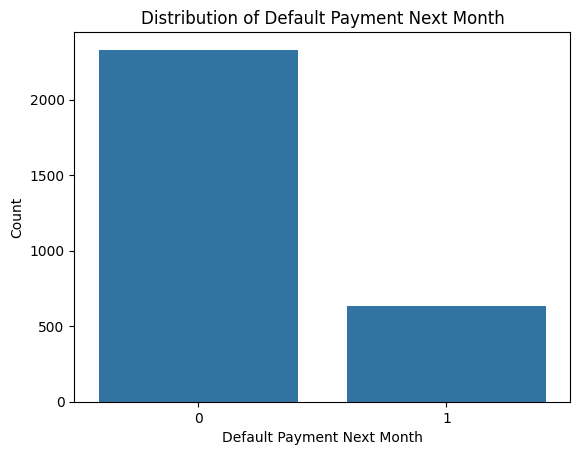

In [351]:
sns.countplot(x='default_payment_next_month', data=data)
plt.title('Distribution of Default Payment Next Month')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.show()


Kita mau cek beberapa client yang lulus bayar utang "0", dan yang gagal bayar utang "1" dari di semua dataset. 

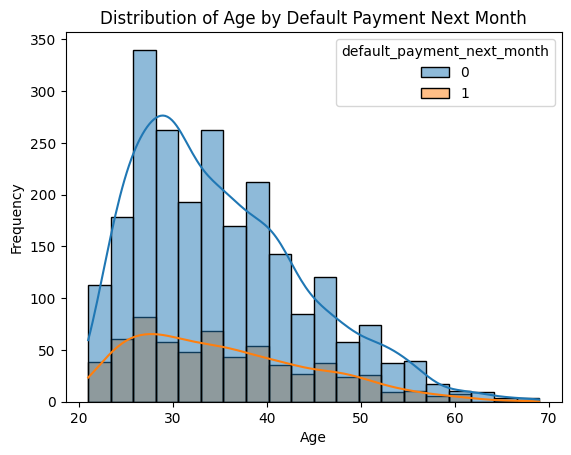

In [352]:
sns.histplot(data=data, x='age', hue='default_payment_next_month', bins=20, kde=True)
plt.title('Distribution of Age by Default Payment Next Month')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Juga mau cek distribusi dari semua client yang lunas atau gagal bayar utang dari keseluruhan dataset. Dari distribusi yang skewed positive, client cenderung kurang dari umur 40-an daripada yang lebih tua dari 40 tahun. 

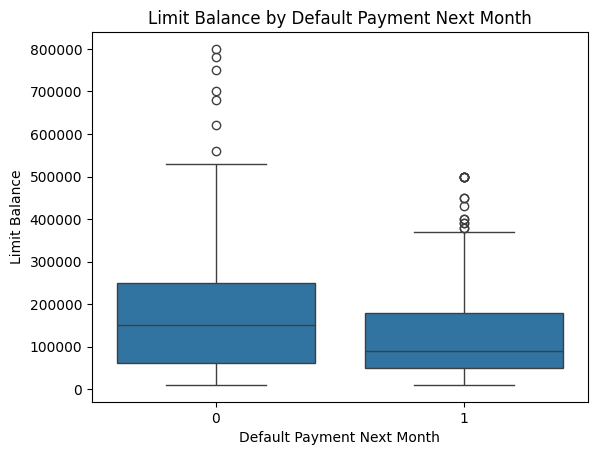

In [353]:
sns.boxplot(x='default_payment_next_month', y='limit_balance', data=data)
plt.title('Limit Balance by Default Payment Next Month')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Limit Balance')
plt.show()


Disini, kita mau lihat perbedaan client yang lunas dan gagal bayar di variable limit balance dengan box plot. Kelihatan client yang lunas bayar tagihan memiliki Limit_balance yang lebih tinggi daripada yang gagal bayar. Outlier untuk client yang mampu bayar tagihan juga lebih luas daripada yang gagal bayar. Ini artinya client-client yang tidak pernah gagal payar lebih mampu untuk ambil pinjaman dari bank dengan balance yang lebih tinggi, juga kemungkinan besar mereka ditawarkan "loan" dengan quota lebih besar setiap bulan. 

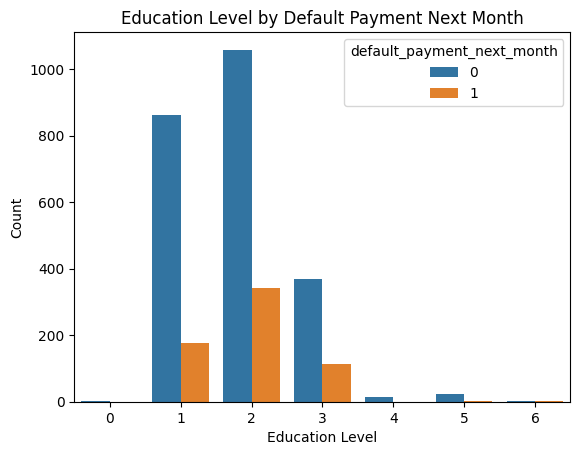

In [354]:
sns.countplot(x='education_level', hue='default_payment_next_month', data=data)
plt.title('Education Level by Default Payment Next Month')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


Kelihatan bahwa kebanyakan client dari bank adalah lulusan "graduate school" dan "university level". Ini artinya proporsi dari populasi yang memiliki sarjana "S1" atau lebih tinggi sangat representatif dari semua client. Juga kelihatan bahwa yang jika pendidikan client lebih tinggi, maka mereka punya kemunkinan untuk bayar balik utang itu juga lebih tinggi. 

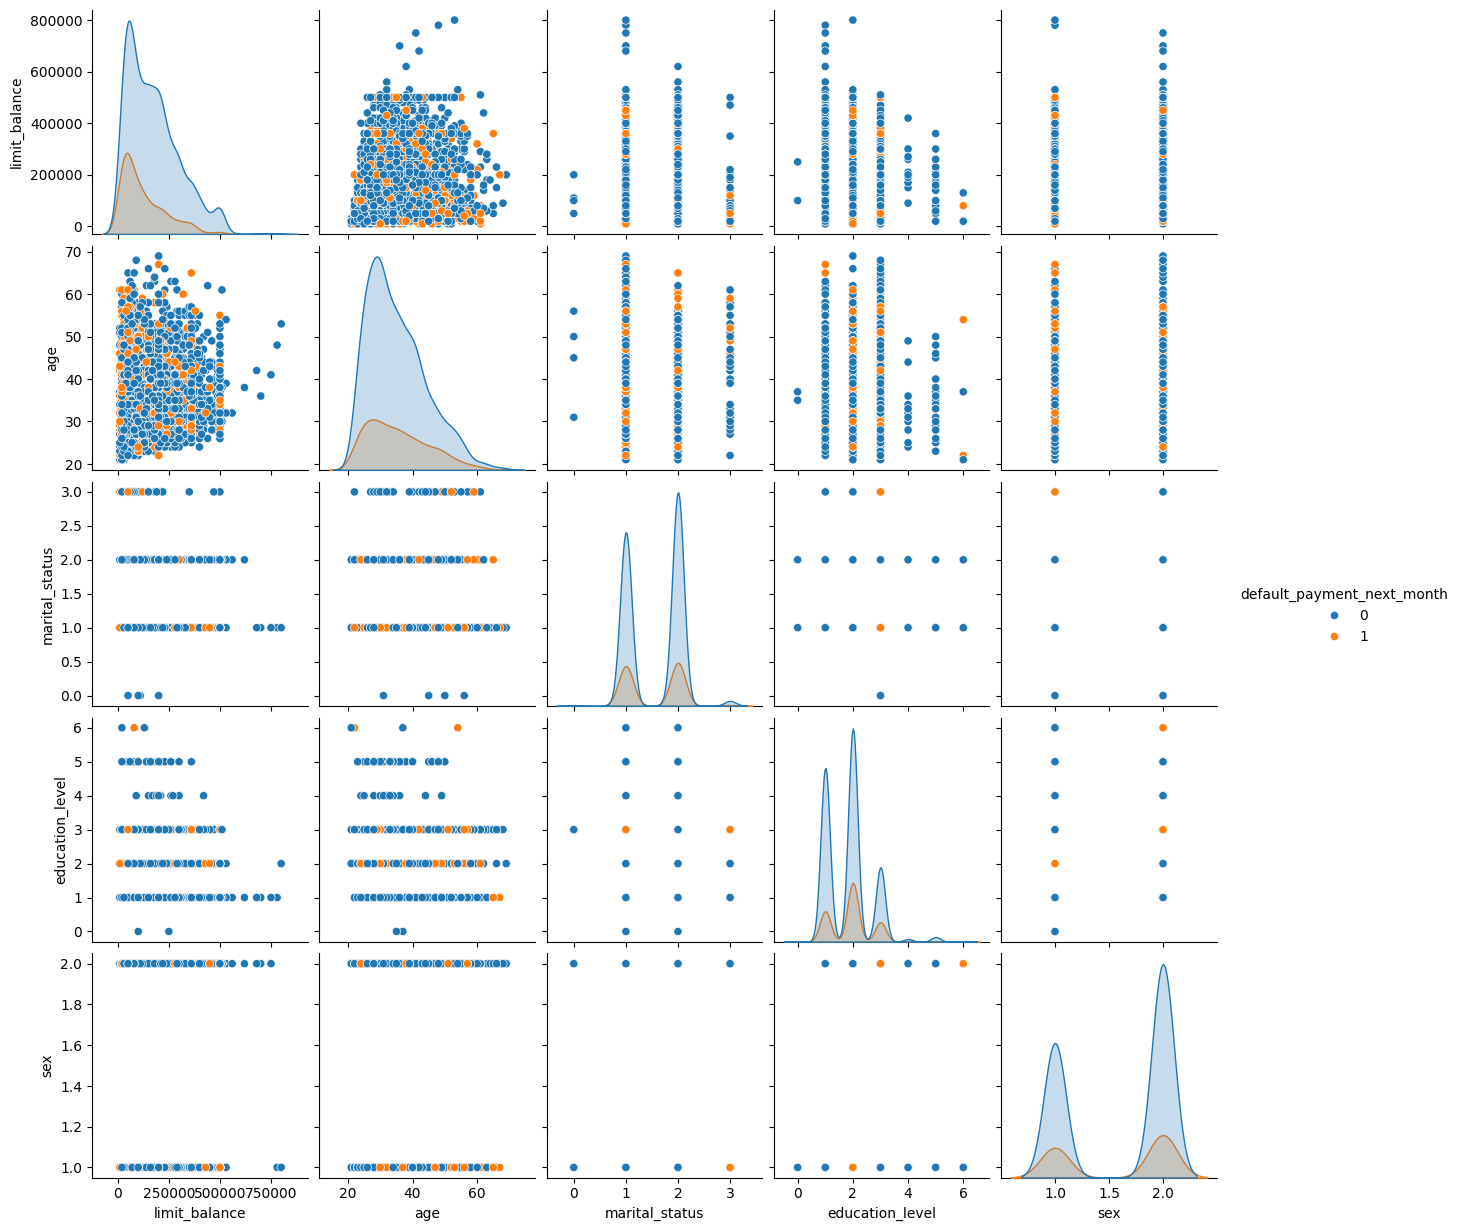

In [355]:
sns.pairplot(data, vars=['limit_balance', 'age', 'marital_status', 'education_level', 'sex'], hue='default_payment_next_month')
#plt.title('Pair Plot of Selected Features')
plt.show()


Disini kita mau lihat jika ada linear relationship antar variable 'age', 'marital_status', dan 'education_level'. Kelihatan data memiliki variable yang sangat luas dengan yang discrete dan continuous, jadi susah diprediksi apa saja yang memiliki linear relationship dari plot tersebut.

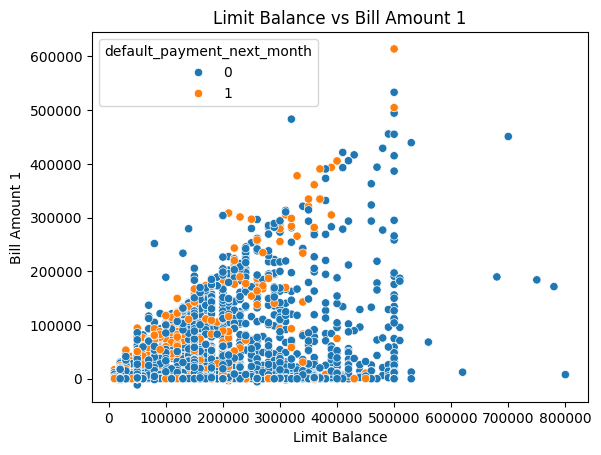

In [356]:
sns.scatterplot(x='limit_balance', y='bill_amt_1', hue='default_payment_next_month', data=data)
plt.title('Limit Balance vs Bill Amount 1')
plt.xlabel('Limit Balance')
plt.ylabel('Bill Amount 1')
plt.show()


Antar variable Limit balance data Bill_amount pertama, bisa kelihatan linear relationship yang positif antar client yang harus utang pembayaran bulan itu dengan total limit balance yang mereka punya di akun mereka. Bisa dibilang bahwa kebanyakan client cenderung memiliki limit baalance dibawah 500000, dan bill_amount mereka naik proporsional jika limit_balance juga lebih tinggi. 

### Split Train Test

In [357]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('default_payment_next_month', axis=1)
y = data['default_payment_next_month'] #yang di prediksi

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Goal kita untuk mencoba Split-train test itu untuk mengevaluasi skala "performance" dari model yang kita gunakan. Kita mau lihat beberapa baik model kita yang baru di-train akan reaksi terhadap data yang baru. Dengan test tersebut, kita akan bisa mengolah data dengan detecting over/underfitting atau menyatakan parameter di dalam training set. 

Kita juga mengunakan test size = 0.2, artinya 80% dari data akan digunakan untuk model training, dan 20% untuk cek "performance".

In [358]:
X_train

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
21         290000.0    1                1               1  56.0    0.0    0.0   
1388       260000.0    1                2               2  28.0    0.0    0.0   
567         60000.0    1                2               2  53.0    0.0    0.0   
1594       150000.0    2                2               2  23.0   -2.0   -1.0   
1017       130000.0    1                2               2  28.0    2.0    2.0   
...             ...  ...              ...             ...   ...    ...    ...   
2014        50000.0    2                1               2  27.0    3.0    2.0   
2157        90000.0    2                3               1  68.0   -2.0   -2.0   
1931       150000.0    2                3               1  48.0    2.0    2.0   
1504       160000.0    1                3               2  38.0    1.0   -2.0   
1712        10000.0    2                1               2  27.0    0.0    0.0   

      pay_3  pay_4  pay_5  ...  bill_amt_3  bill_amt_4  bill_amt_5  \
21      0.0    0.0    0.0  ...    415700.0    232732.0    220460.0   
1388    2.0    0.0    0.0  ...    163036.0    159348.0    160198.0   
567     0.0    0.0    0.0  ...     57432.0     27126.0     27579.0   
1594   -1.0    0.0    0.0  ...    151996.0    152753.0    153844.0   
1017    0.0    0.0    0.0  ...     70184.0      8518.0     11296.0   
...     ...    ...    ...  ...         ...         ...         ...   
2014    2.0    7.0    7.0  ...       300.0       300.0       300.0   
2157   -2.0   -2.0   -1.0  ...      1000.0      1000.0      1052.0   
1931    2.0    2.0    2.0  ...     62650.0     59255.0     45983.0   
1504   -2.0   -1.0    0.0  ...         0.0       700.0       700.0   
1712    0.0    2.0    2.0  ...     10255.0      9389.0      8345.0   

      bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  \
21      224780.0    10013.0     8501.0    15018.0    10001.0     7997.0   
1388    104389.0   107000.0        0.0     5000.0     5000.0     6000.0   
567      29085.0     3000.0     4000.0     2000.0     2000.0     2000.0   
1594    151252.0    10096.0   156292.0     4700.0     5019.0     5300.0   
1017      6514.0        0.0     3000.0     2000.0     3000.0     2000.0   
...          ...        ...        ...        ...        ...        ...   
2014       300.0        0.0        0.0        0.0        0.0        0.0   
2157     69237.0        0.0     1000.0     1000.0     1052.0    71062.0   
1931     52986.0     5950.0        0.0    10000.0        0.0    20000.0   
1504         0.0        0.0        0.0      700.0        0.0        0.0   
1712      8572.0     1400.0     2500.0      500.0        0.0      500.0   

      pay_amt_6  
21       7624.0  
1388    60000.0  
567      2000.0  
1594     5002.0  
1017        0.0  
...         ...  
2014        0.0  
2157     3000.0  
1931        0.0  
1504        0.0  
1712     2000.0  

[2372 rows x 23 columns]

Ini dari bagian X-train yang akan digunakan oleh machine learning. 

In [359]:
y_train

21      0
1388    0
567     0
1594    0
1017    1
       ..
2014    1
2157    0
1931    1
1504    0
1712    0
Name: default_payment_next_month, Length: 2372, dtype: int64

Ini dari kolom "default_payment_next_month" yang akan di-train dengan Machine Learning.

### Handling Missing Values

In [360]:
X_train.dropna(inplace=True)

In [361]:
X_test.dropna(inplace=True)

In [362]:
y_train.dropna(inplace=True)

In [363]:
y_test.dropna(inplace=True)

Tadi kita cek tidak ada missing values di keseluruhan data, tapi kita cuman mau cek lagi jika ada missing values yang perlu di-drop lagi. 

### Handling Outliers

In [364]:
# Selecting numerical and categorical columns
num_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print('Categorical Columns: ', cat_columns)
print('Numerical Columns: ', num_columns)

Categorical Columns:  []
Numerical Columns:  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


Untuk handle outliers, kita mau bagi dataset menjadi dua tipe kolom numerikal dan kategorikal. Ini untuk memastikan bisa diolah dengan training model dengan technique feature selection yang benar. Data yang berisi dengan integer atau float akan dimasukan ke kolom list num_columns, dan data dengan object atau category sebagai tipe akan dimasukan sebagai cat_columns. 

In [365]:
# Making data and columns for normal distribution
data_normal = []
column_normal = []

# Making data and columns for skewed distribution
data_skewed = []
column_skewed = []

# For loop in every numerical column to filter the data distribution into either normally distributed or skewed columns
for num in num_columns:
    skewness = X_train[num].skew()

    # If the data is normally distributed
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        data_normal.append([num, skewness])

    # If the data has low negative skewness
    elif skewness < -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # If the data has low positive skewness
    elif skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # If the data has moderate negative skewness
    elif skewness <= -0.5 and skewness > -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # If the data has moderate positive skewness
    elif skewness >= 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])


Kita mau perbedakan variable yang memiliki skew normal dan yang tidak normal.

In [366]:
# Showing normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

normal_distribution  skewness
0                 sex -0.451482
1      marital_status -0.041328

Kelihatan cuman sex dan marital_status memiliki skew yang normal.

In [367]:
# Showing skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

skewed_distribution   skewness  rate
0        limit_balance   1.013432  high
1      education_level   0.913215   low
2                  age   0.757115   low
3                pay_0   0.910223   low
4                pay_2   0.852870   low
5                pay_3   0.970325   low
6                pay_4   1.153104  high
7                pay_5   1.079227  high
8                pay_6   1.011001  high
9           bill_amt_1   2.421285  high
10          bill_amt_2   2.438696  high
11          bill_amt_3   2.625471  high
12          bill_amt_4   2.508942  high
13          bill_amt_5   2.464289  high
14          bill_amt_6   2.503029  high
15           pay_amt_1  12.116671  high
16           pay_amt_2  28.106058  high
17           pay_amt_3   8.051309  high
18           pay_amt_4   8.888920  high
19           pay_amt_5  12.525019  high
20           pay_amt_6  10.277112  high

Banyak variable di dataset yang memiliki skew yang tinggi daripada yang rendah. Ini artinya dataset memiliki skew yang cenderung positif. 

In [368]:
# Capping Method for Normal Distribution
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=column_normal,
                            missing_values='ignore')

# Fit & Transforming X_train
X_train_capped = winsorizer_normal.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal.transform(X_test)

Kita mau coba "cap" outlier yang memiliki skew normal. Ini jadi dataset tidak akan terlalu sensitif terhadap outlier yang akan diubah. 

In [369]:
# Capping Method for Skewed Distribution
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=column_skewed)

# Fit & Transforming X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

Kita mau coba "cap" outlier yang memiliki skew tidak normal. Ini jadi dataset tidak akan terlalu sensitif terhadap outlier yang akan diubah. 

In [370]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Ini kita mau coba illustrasi variable apa saja yang telah diubah dengan beberapa "capping" metode. 

## Feature Engineering

In [371]:

list_num_col = ['limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
                'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 
                'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
list_cat_col = ['sex', 'education_level', 'marital_status']



Untuk di feature engineering, kita mau define beberapa variable category secara manual karena beberapa variable kategori sudah di encode. Untuk mempermudah machine learning nanti, kita akan coba perbedaan variable numerikal dan kategorikal. 

In [372]:
X_train_capped

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
21         290000.0    1                1             1.0  56.0    0.0    0.0   
1388       260000.0    1                2             2.0  28.0    0.0    0.0   
567         60000.0    1                2             2.0  53.0    0.0    0.0   
1594       150000.0    2                2             2.0  23.0   -2.0   -1.0   
1017       130000.0    1                2             2.0  28.0    2.0    2.0   
...             ...  ...              ...             ...   ...    ...    ...   
2014        50000.0    2                1             2.0  27.0    3.0    2.0   
2157        90000.0    2                3             1.0  68.0   -2.0   -2.0   
1931       150000.0    2                3             1.0  48.0    2.0    2.0   
1504       160000.0    1                3             2.0  38.0    1.0   -2.0   
1712        10000.0    2                1             2.0  27.0    0.0    0.0   

      pay_3  pay_4  pay_5  ...  bill_amt_3  bill_amt_4  bill_amt_5  \
21      0.0    0.0    0.0  ...   240879.75   223294.75    207163.0   
1388    2.0    0.0    0.0  ...   163036.00   159348.00    160198.0   
567     0.0    0.0    0.0  ...    57432.00    27126.00     27579.0   
1594   -1.0    0.0    0.0  ...   151996.00   152753.00    153844.0   
1017    0.0    0.0    0.0  ...    70184.00     8518.00     11296.0   
...     ...    ...    ...  ...         ...         ...         ...   
2014    2.0    3.0    3.0  ...      300.00      300.00       300.0   
2157   -2.0   -2.0   -1.0  ...     1000.00     1000.00      1052.0   
1931    2.0    2.0    2.0  ...    62650.00    59255.00     45983.0   
1504   -2.0   -1.0    0.0  ...        0.00      700.00       700.0   
1712    0.0    2.0    2.0  ...    10255.00     9389.00      8345.0   

      bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  \
21     204697.25   10013.00    8501.00    15018.0    10001.0    7997.00   
1388   104389.00   17120.75       0.00     5000.0     5000.0    6000.00   
567     29085.00    3000.00    4000.00     2000.0     2000.0    2000.00   
1594   151252.00   10096.00   17215.25     4700.0     5019.0    5300.00   
1017     6514.00       0.00    3000.00     2000.0     3000.0    2000.00   
...          ...        ...        ...        ...        ...        ...   
2014      300.00       0.00       0.00        0.0        0.0       0.00   
2157    69237.00       0.00    1000.00     1000.0     1052.0   14871.25   
1931    52986.00    5950.00       0.00    10000.0        0.0   14871.25   
1504        0.00       0.00       0.00      700.0        0.0       0.00   
1712     8572.00    1400.00    2500.00      500.0        0.0     500.00   

      pay_amt_6  
21       7624.0  
1388    15427.0  
567      2000.0  
1594     5002.0  
1017        0.0  
...         ...  
2014        0.0  
2157     3000.0  
1931        0.0  
1504        0.0  
1712     2000.0  

[2372 rows x 23 columns]

Coba lihat data dari X_train yang sudah diubah outlier-nya. 

In [373]:
# Splitting the train and test features into categorical and numerical columns
X_train_num = X_train_capped[list_num_col]
X_train_cat = X_train_capped[list_cat_col]

X_test_num = X_test_capped[list_num_col]
X_test_cat = X_test_capped[list_cat_col]

X_train_num.head()

limit_balance   age  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  \
21         290000.0  56.0    0.0    0.0    0.0    0.0    0.0    0.0   
1388       260000.0  28.0    0.0    0.0    2.0    0.0    0.0    0.0   
567         60000.0  53.0    0.0    0.0    0.0    0.0    0.0    0.0   
1594       150000.0  23.0   -2.0   -1.0   -1.0    0.0    0.0    0.0   
1017       130000.0  28.0    2.0    2.0    0.0    0.0    0.0    0.0   

      bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  bill_amt_5  bill_amt_6  \
21      222000.0    226917.0   240879.75   223294.75    207163.0   204697.25   
1388    149814.0    184419.0   163036.00   159348.00    160198.0   104389.00   
567      56765.0     57849.0    57432.00    27126.00     27579.0    29085.00   
1594     27414.0     10053.0   151996.00   152753.00    153844.0   151252.00   
1017     70952.0     69264.0    70184.00     8518.00     11296.0     6514.00   

      pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  
21     10013.00    8501.00    15018.0    10001.0     7997.0     7624.0  
1388   17120.75       0.00     5000.0     5000.0     6000.0    15427.0  
567     3000.00    4000.00     2000.0     2000.0     2000.0     2000.0  
1594   10096.00   17215.25     4700.0     5019.0     5300.0     5002.0  
1017       0.00    3000.00     2000.0     3000.0     2000.0        0.0

Kita mau assign numerikal dan kategorikal kolom kepada variabble baru untuk diuji korelasi. 

In [374]:
#Finding the correlation between categorical columns and Y Train using Kendall Tau's correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_cat_cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant')
    selected_cat_cols.append(col)
  else :
    interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

Column Name  Correlation Coefficient   P-value      Correlation
0              sex                -0.026333  0.199759  Not Significant
1  education_level                 0.063256  0.001185      Significant
2   marital_status                -0.032835  0.107643  Not Significant

Gunakan KendallTau test terhadap kategorikal kolom untuk melihat p-value yang signifikan.

In [375]:
#Finding the correlation between numerical columns and Y Train using pearsonr and spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:
    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:
    #For Skewed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

Column Name  Correlation Coefficient       P-value      Correlation
0   limit_balance                -0.170428  6.420760e-17      Significant
1             age                 0.029120  1.562476e-01  Not Significant
2           pay_0                 0.358716  5.899447e-73      Significant
3           pay_2                 0.237626  8.379995e-32      Significant
4           pay_3                 0.222975  4.151099e-28      Significant
5           pay_4                 0.253177  5.201433e-36      Significant
6           pay_5                 0.251801  1.260071e-35      Significant
7           pay_6                 0.230625  5.259622e-30      Significant
8      bill_amt_1                -0.008214  6.892859e-01  Not Significant
9      bill_amt_2                 0.003705  8.568704e-01  Not Significant
10     bill_amt_3                 0.005352  7.944745e-01  Not Significant
11     bill_amt_4                 0.005819  7.769890e-01  Not Significant
12     bill_amt_5                 0.011319  5.816419e-01  Not Significant
13     bill_amt_6                 0.020326  3.223980e-01  Not Significant
14      pay_amt_1                -0.144292  1.655782e-12      Significant
15      pay_amt_2                -0.147831  4.627461e-13      Significant
16      pay_amt_3                -0.117931  8.375614e-09      Significant
17      pay_amt_4                -0.128978  2.888231e-10      Significant
18      pay_amt_5                -0.095580  3.112395e-06      Significant
19      pay_amt_6                -0.137028  2.058593e-11      Significant

Gunakan Pearson dan Spearman test terhadap numerikal kolom untuk melihat p-value yang signifikan.

In [376]:
# Show selected columns based on the correlation test
print(selected_cat_cols)
print(selected_num_cols)

['education_level']
['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


Kita akan ambil data yang signifikan dari kategorikal dan numerikal kolom untuk di scaling nanti. Ini akan jadi "base" data yang akan digunakan Machine Learning untuk memastikan "fitting" terhadap model yang akan dibuat. 

In [377]:
# Updating Numerical and Categorical Columns
X_train_cat = X_train_cat[selected_cat_cols]
X_train_num = X_train_num[selected_num_cols]

X_test_cat = X_test_cat[selected_cat_cols]
X_test_num = X_test_num[selected_num_cols]

#Show first five data from the updated X_train
X_train_num.head()

limit_balance  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  pay_amt_1  \
21         290000.0    0.0    0.0    0.0    0.0    0.0    0.0   10013.00   
1388       260000.0    0.0    0.0    2.0    0.0    0.0    0.0   17120.75   
567         60000.0    0.0    0.0    0.0    0.0    0.0    0.0    3000.00   
1594       150000.0   -2.0   -1.0   -1.0    0.0    0.0    0.0   10096.00   
1017       130000.0    2.0    2.0    0.0    0.0    0.0    0.0       0.00   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  
21      8501.00    15018.0    10001.0     7997.0     7624.0  
1388       0.00     5000.0     5000.0     6000.0    15427.0  
567     4000.00     2000.0     2000.0     2000.0     2000.0  
1594   17215.25     4700.0     5019.0     5300.0     5002.0  
1017    3000.00     2000.0     3000.0     2000.0        0.0

Letakan kategorikal dan numerikal kolom yang terpilih tadi ke variable baru untuk siap di-training. 

### Scaling

In [378]:
#Initialize the MinMaxScaler
scaler = MinMaxScaler()

#Fit_transform for X_train, transform for X_test
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

X_train_scaled

array([[0.36842105, 0.4       , 0.4       , ..., 0.66426448, 0.53774901,
        0.49419848],
       [0.32894737, 0.4       , 0.4       , ..., 0.33209903, 0.40346306,
        1.        ],
       [0.06578947, 0.4       , 0.4       , ..., 0.13283961, 0.13448769,
        0.12964283],
       ...,
       [0.18421053, 0.8       , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.19736842, 0.6       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.4       , 0.4       , ..., 0.        , 0.03362192,
        0.12964283]])

Untuk numerikal data, kita akan mengunakan MinMaxScaler daripada Standard atau Robust scaler karena kita mau coba simpan distribusi original data tanpa mengubah perbedaan "range" antar values yang telah ditampilkan. Juga tadi outlier sudah di "cap" dengan Winsoriser, jadi sekarang data numerikal yang akan di-scale akan lebih sensitif terhadap perbedaan values. Juga distribusi dari numerikal values juga tidak normal, jadi StandardScaler tidak sesuai untuk variasi yang terlalu skewed. 

In [379]:
X_train_final = np.concatenate([X_train_cat, X_train_scaled], axis=1)
X_test_final = np.concatenate([X_test_cat, X_test_scaled], axis=1)

# Get the column names
column_names =  list(X_train_cat.columns) + list(X_train_num.columns)

# Create DataFrames with column names
X_train_final = pd.DataFrame(X_train_final, columns=column_names)
X_test_final = pd.DataFrame(X_test_final, columns=column_names)

Kita akan taruh balik dari X_train dan X_test variables dengan yang sudah di "scaled" untuk membuat list baru di variable "final". X_train_final dan X_test_final akan digunakan untuk model yang akan diuji. 

In [380]:
X_train_final

education_level  limit_balance  pay_0  pay_2  pay_3  pay_4  pay_5  \
0                 1.0       0.368421    0.4    0.4    0.4    0.4    0.4   
1                 2.0       0.328947    0.4    0.4    0.8    0.4    0.4   
2                 2.0       0.065789    0.4    0.4    0.4    0.4    0.4   
3                 2.0       0.184211    0.0    0.2    0.2    0.4    0.4   
4                 2.0       0.157895    0.8    0.8    0.4    0.4    0.4   
...               ...            ...    ...    ...    ...    ...    ...   
2367              1.0       0.052632    1.0    0.8    0.8    1.0    1.0   
2368              3.0       0.105263    0.0    0.0    0.0    0.0    0.2   
2369              3.0       0.184211    0.8    0.8    0.8    0.8    0.8   
2370              3.0       0.197368    0.6    0.0    0.0    0.2    0.4   
2371              1.0       0.000000    0.4    0.4    0.4    0.8    0.8   

      pay_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  
0       0.4   0.584846   0.493806   0.916430   0.664264   0.537749   0.494198  
1       0.4   1.000000   0.000000   0.305111   0.332099   0.403463   1.000000  
2       0.4   0.175226   0.232352   0.122044   0.132840   0.134488   0.129643  
3       0.4   0.589694   1.000000   0.286804   0.333361   0.356392   0.324237  
4       0.4   0.000000   0.174264   0.122044   0.199259   0.134488   0.000000  
...     ...        ...        ...        ...        ...        ...        ...  
2367    1.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
2368    0.2   0.000000   0.058088   0.061022   0.069874   1.000000   0.194464  
2369    0.8   0.347532   0.000000   0.610221   0.000000   1.000000   0.000000  
2370    0.4   0.000000   0.000000   0.042715   0.000000   0.000000   0.000000  
2371    0.4   0.081772   0.145220   0.030511   0.000000   0.033622   0.129643  

[2372 rows x 14 columns]

Cek lagi jika sudah di-concate dengan benar. 

## Model Definition

In [381]:
lg = LogisticRegression()
lg.fit(X_train_final, y_train)

LogisticRegression()

Kita akan mengunkan Logistic Regression daripada Linear karena tipe data yang diujui, "default" atau tidak, itu adalah binary dengan dua outcome. Ini artinya output dari probability value itu antara 0 dan 1. 

In [382]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

Kita akan menggunakan KNN test untuk mengklasifikasi dataset yang ada jarak dari K, dan perbedakan klasifikasi dari satu data-point dengan yang lain di sekitarnya. Kita mau lihat nilai rata-rata weighted average dari jarak K value yang kita akan gunakan.  

In [383]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

SVC akan digunakan untuk klasifisikan beberapa kelas dengan hyperplane dan support vectors. Kita juga akan coba uji dengan Regularization parameter (C) dan Kernel trick untuk lihat mana nilai akurasi, precision, dan recall yang paling sesuai untuk test tersebut. 

In [384]:
svm_non_scaled = SVC(kernel='rbf')
svm_scaled = SVC(kernel='rbf')

svm_non_scaled.fit(X_train, y_train)
svm_scaled.fit(X_train_scaled, y_train)

SVC()

Untuk test SVM_scaled, akan mengunakan RBF karena kita tidak tau data distribusi tersebut, juga kita asumsi data boundary tidak linear. 

In [385]:
# Model Training using different kernels

svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train_scaled, y_train)
svm_poly.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

SVC()

Kita akan coba perbandingkan "linear", "polynomial", dan "RBF" kernel untuk lihat nilai test. 

In [386]:
svm_rbf_1 = SVC(kernel='rbf', C=0.1)
svm_rbf_500 = SVC(kernel='rbf', C=500)

svm_rbf_1.fit(X_train_scaled, y_train)
svm_rbf_500.fit(X_train_scaled, y_train)

SVC(C=500)

Gunakan C regularization untuk minimalisir classification error yang akan menjadi test "overfitting". 

In [387]:
svm_rbf_500_1 = SVC(kernel='rbf', C=500, gamma=0.1)
svm_rbf_500_100 = SVC(kernel='rbf', C=500, gamma=100)

svm_rbf_500_1.fit(X_train_scaled, y_train)
svm_rbf_500_100.fit(X_train_scaled, y_train)

SVC(C=500, gamma=100)

Coba Gamma test untuk melihat beberapa influence satu point akan terhadap keseluruhan test. 

In [388]:
# Training using Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=6, random_state=10)
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6, random_state=10)

Gunakan Decision tree untuk mengillustrasi perbedaan dari data points yang telah diklasifikasikan oleh Machine Learning. 

## Model Training

In [389]:
y_pred_train_lg = lg.predict(X_train_final)
y_pred_test_lg = lg.predict(X_test_final)

In [390]:
# Model Evaluation - Train Set & Test Set

print(classification_report(y_train, y_pred_train_lg))
print(classification_report(y_test, y_pred_test_lg))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1863
           1       0.72      0.28      0.40       509

    accuracy                           0.82      2372
   macro avg       0.77      0.62      0.65      2372
weighted avg       0.81      0.82      0.79      2372

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       467
           1       0.75      0.31      0.44       126

    accuracy                           0.83       593
   macro avg       0.79      0.64      0.67       593
weighted avg       0.82      0.83      0.80       593



In [391]:
# Model Evaluation - Train Set
train_report_dict = classification_report(y_train, y_pred_train_lg, output_dict=True)
train_accuracy = accuracy_score(y_train, y_pred_train_lg)

print("Train Set Evaluation:")
#print(classification_report(y_train, y_pred_train_lg))
print(f"accuracy: {train_accuracy:.4f}")
print(f"precision (weighted avg): {train_report_dict['weighted avg']['precision']:.4f}")
print(f"recall (weighted avg): {train_report_dict['weighted avg']['recall']:.4f}")
print(f"f1-score (weighted avg): {train_report_dict['weighted avg']['f1-score']:.4f}")

# Model Evaluation - Test Set
test_report_dict = classification_report(y_test, y_pred_test_lg, output_dict=True)
test_accuracy = accuracy_score(y_test, y_pred_test_lg)

print("Test Set Evaluation:")
#print(classification_report(y_test, y_pred_test_lg))
print(f"accuracy: {test_accuracy:.4f}")
print(f"precision (weighted avg): {test_report_dict['weighted avg']['precision']:.4f}")
print(f"recall (weighted avg): {test_report_dict['weighted avg']['recall']:.4f}")
print(f"f1-score (weighted avg): {test_report_dict['weighted avg']['f1-score']:.4f}")


Train Set Evaluation:
accuracy: 0.8217
precision (weighted avg): 0.8067
recall (weighted avg): 0.8217
f1-score (weighted avg): 0.7893
Test Set Evaluation:
accuracy: 0.8314
precision (weighted avg): 0.8202
recall (weighted avg): 0.8314
f1-score (weighted avg): 0.8025


Untuk test Logistic Regression, kelihatan nilai accuracy, precision, recall dan f1-score untuk Test dan Train set itu cukup tepat disekitar 0.8. Untuk values yang "default" atau "1", test tidak terlalu memiliki performance yang baik dengan skor yang rata-rata rendah karena sample size lebih kecil, oleh karena itu training untuk data yang lulus bayar lebih baik daripada yang gagal bayar.  

In [392]:
# Model Prediction

y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_test_knn = knn.predict(X_test_scaled)

In [393]:
# Model Evaluation - Train Set & Test Set

print(classification_report(y_train, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1863
           1       0.73      0.36      0.48       509

    accuracy                           0.83      2372
   macro avg       0.79      0.66      0.69      2372
weighted avg       0.82      0.83      0.81      2372

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       467
           1       0.74      0.36      0.48       126

    accuracy                           0.84       593
   macro avg       0.79      0.66      0.69       593
weighted avg       0.82      0.84      0.81       593



In [394]:
# Model Evaluation - Train Set
train_report_knn = classification_report(y_train, y_pred_train_knn, output_dict=True)
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)

print("Train Set Evaluation (KNN):")
#print(classification_report(y_train, y_pred_train_knn))
print(f"accuracy: {train_accuracy_knn:.4f}")
print(f"precision (weighted avg): {train_report_knn['weighted avg']['precision']:.4f}")
print(f"recall (weighted avg): {train_report_knn['weighted avg']['recall']:.4f}")
print(f"f1-score (weighted avg): {train_report_knn['weighted avg']['f1-score']:.4f}")

# Model Evaluation - Test Set
test_report_knn = classification_report(y_test, y_pred_test_knn, output_dict=True)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)

print("Test Set Evaluation (KNN):")
#print(classification_report(y_test, y_pred_test_knn))
print(f"accuracy: {test_accuracy_knn:.4f}")
print(f"precision (weighted avg): {test_report_knn['weighted avg']['precision']:.4f}")
print(f"recall (weighted avg): {test_report_knn['weighted avg']['recall']:.4f}")
print(f"f1-score (weighted avg): {test_report_knn['weighted avg']['f1-score']:.4f}")


Train Set Evaluation (KNN):
accuracy: 0.8339
precision (weighted avg): 0.8209
recall (weighted avg): 0.8339
f1-score (weighted avg): 0.8116
Test Set Evaluation (KNN):
accuracy: 0.8364
precision (weighted avg): 0.8244
recall (weighted avg): 0.8364
f1-score (weighted avg): 0.8133


Untuk test KNN, kelihatan nilai accuracy, precision, recall dan f1-score untuk Test dan Train set itu cukup tepat disekitar 0.8. Untuk values yang "default" atau "1", test tidak terlalu memiliki performance yang baik dengan skor yang rata-rata rendah, sama situasi dengan test sebelumnya. 

In [395]:
y_pred_train_svc = svc.predict(X_train_scaled)
y_pred_test_svc = svc.predict(X_test_scaled)

In [396]:
print(classification_report(y_train, y_pred_train_svc))
print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1863
           1       0.77      0.38      0.51       509

    accuracy                           0.84      2372
   macro avg       0.81      0.67      0.71      2372
weighted avg       0.83      0.84      0.82      2372

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       467
           1       0.77      0.40      0.52       126

    accuracy                           0.85       593
   macro avg       0.81      0.68      0.72       593
weighted avg       0.84      0.85      0.83       593



In [397]:
# Model Evaluation - Train Set
train_report_svc = classification_report(y_train, y_pred_train_svc, output_dict=True)
train_accuracy_svc = accuracy_score(y_train, y_pred_train_svc)

print("Train Set Evaluation (SVC):")
#print(classification_report(y_train, y_pred_train_svc))
print(f"accuracy: {train_accuracy_svc:.4f}")
print(f"precision (weighted avg): {train_report_svc['weighted avg']['precision']:.4f}")
print(f"recall (weighted avg): {train_report_svc['weighted avg']['recall']:.4f}")
print(f"f1-score (weighted avg): {train_report_svc['weighted avg']['f1-score']:.4f}")

# Model Evaluation - Test Set
test_report_svc = classification_report(y_test, y_pred_test_svc, output_dict=True)
test_accuracy_svc = accuracy_score(y_test, y_pred_test_svc)

print("Test Set Evaluation (SVC):")
#print(classification_report(y_test, y_pred_test_svc))
print(f"accuracy: {test_accuracy_svc:.4f}")
print(f"precision (weighted avg): {test_report_svc['weighted avg']['precision']:.4f}")
print(f"recall (weighted avg): {test_report_svc['weighted avg']['recall']:.4f}")
print(f"f1-score (weighted avg): {test_report_svc['weighted avg']['f1-score']:.4f}")


Train Set Evaluation (SVC):
accuracy: 0.8423
precision (weighted avg): 0.8336
recall (weighted avg): 0.8423
f1-score (weighted avg): 0.8204
Test Set Evaluation (SVC):
accuracy: 0.8465
precision (weighted avg): 0.8376
recall (weighted avg): 0.8465
f1-score (weighted avg): 0.8267


Untuk test SVC, kelihatan nilai accuracy, precision, recall dan f1-score untuk Test dan Train set itu cukup tepat disekitar 0.8. Untuk values yang "default" atau "1", test tidak terlalu memiliki performance yang baik dengan skor yang rata-rata rendah, sama situasi dengan test sebelumnya. Oleh Karena SVC memiliki akurasi, precision, recall, dan f-1 score yang paling baik, maka kita akan coba cross-validate dengan SVC dataset. 

In [398]:
# Model Evaluation

def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  return f1_score(y, y_pred)

print('Non Scaled SVM')
print('Train : ', performance_check(svm_non_scaled, X_train, y_train))
print('Test  : ', performance_check(svm_non_scaled, X_test, y_test))
print('')

print('Scaled SVM')
print('Train : ', performance_check(svm_scaled, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_scaled, X_test_scaled, y_test))

Non Scaled SVM
Train :  0.00392156862745098
Test  :  0.0

Scaled SVM
Train :  0.5065963060686016
Test  :  0.5235602094240838


Bisa diperbandinkan untuk performance chek f-1 score antar train dan test values di SVM. Skor lebih rendah daripada classification report, ini artinya ada masalah fitting atau gunakan hyperparameter tuning nanti. 

In [399]:
# Model Evaluation

print('SVM - Linear')
print('Train : ', performance_check(svm_linear, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_linear, X_test_scaled, y_test))
print('')

print('SVM - Polynomial')
print('Train : ', performance_check(svm_poly, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_poly, X_test_scaled, y_test))
print('')

print('SVM - RBF')
print('Train : ', performance_check(svm_rbf, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_rbf, X_test_scaled, y_test))
print('')

SVM - Linear
Train :  0.472258064516129
Test  :  0.5025641025641026

SVM - Polynomial


Train :  0.5301837270341208
Test  :  0.5157894736842106

SVM - RBF
Train :  0.5065963060686016
Test  :  0.5235602094240838



Performance antara Linear, Poly, dan RBF sangat dekat, walaupun yang Polynomial paling baik nilai yang cenderung tinggi untuk Train dan Test. 

In [400]:
# Model Evaluation

print('SVM - C=0.1')
print('Train : ', performance_check(svm_rbf_1, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_rbf_1, X_test_scaled, y_test))
print('')

print('SVM - C=500')
print('Train : ', performance_check(svm_rbf_500, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_rbf_500, X_test_scaled, y_test))
print('')

SVM - C=0.1


Train :  0.3203732503888025
Test  :  0.3712574850299401

SVM - C=500
Train :  0.831140350877193
Test  :  0.4773662551440329



Untuk C Regularization test, bisa kelihatan C value yang lebih tinggi artinya akan punya penalty terhadap data yang "misclassified" jadi toleransi terhadap data yang salah lebih kecil. Oleh karena itu, SVM yang punya C value yang besar akan cenderung punya akurasi yang baik. 

In [401]:
print('SVM - gamma=0.1')
print('Train : ', performance_check(svm_rbf_500_1, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_rbf_500_1, X_test_scaled, y_test))
print('')

print('SVM - gamma=100')
print('Train : ', performance_check(svm_rbf_500_100, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_rbf_500_100, X_test_scaled, y_test))
print('')

SVM - gamma=0.1


Train :  0.5137614678899083
Test  :  0.5284974093264249

SVM - gamma=100
Train :  0.9891411648568608
Test  :  0.1566265060240964



Untuk gamma, kelihatan juga value gamma yang lebih besar akan berdampak "overfitting" terhadap training dataset. 

Decision Tree - Train


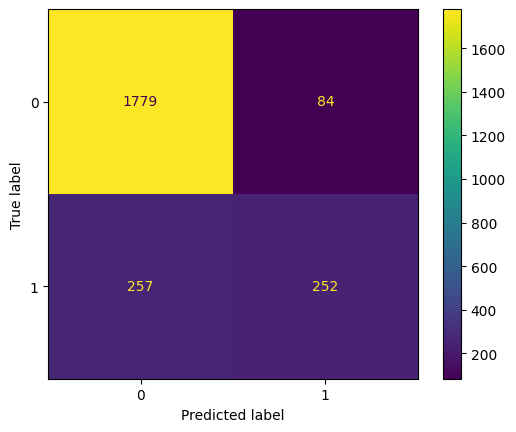

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1863
           1       0.75      0.50      0.60       509

    accuracy                           0.86      2372
   macro avg       0.81      0.72      0.75      2372
weighted avg       0.85      0.86      0.84      2372


Decision Tree - Test


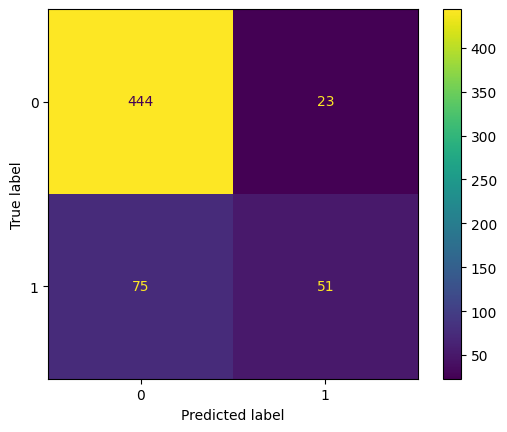

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       467
           1       0.69      0.40      0.51       126

    accuracy                           0.83       593
   macro avg       0.77      0.68      0.71       593
weighted avg       0.82      0.83      0.82       593



In [402]:
# Model Evaluation

def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred))

print('Decision Tree - Train')
performance_check(model_dt, X_train_scaled, y_train)
print('')

print('Decision Tree - Test')
performance_check(model_dt, X_test_scaled, y_test)

Kita coba buat decision tree untuk melihat rangka model performance seperti TP, TN, FP, dan FN. Kelihatan bahwa data yang True Negative adalah mayoritas untuk Training dan Test Dataset. Ini artinya client yang lunas bayar utang benar diprediksi untuk bayar utang dengan tepat waktu. Di sisi lain, True positive juga cukup signifikan oleh karena banyak orang di train dan test dataset tidak bayar dengan lunas, dan model prediksi dengan benar.

Untuk masalah yang parah, False Negative adalah situasi jika model tidak prediksi dengan benar jika client tidak bisa bayar utang atau "default", tetapi model prediksi bisa lunas bayar. Di train dataset memiliki sekitar 250-an sample yang False Negative, ini sangat tinggi terhadap resiko bank untuk kasih pinjaman atau "loan" terhadap client yang tidak mampu bayar.

Juga, dataset memiliki False Positif yang cukup tinggi juga jika model salah prediksi client yang kelihatannya tidak bisa bayar, tetapi mampu bayar. Ini juga masalah dari model karena client tersebut bisa di "accuse" untuk tidak bisa bayar, dan reputasi dari bank bisa terdampak negatif. 

## Model Evaluation

In [403]:
# Calculate predictions for training and test sets
y_train_pred = lg.predict(X_train_final)
y_test_pred = lg.predict(X_test_final)

Untuk Model Evaluasi, Kita akan ambil dua X_train dan X_test file dan akan coba prediksi untuk di-test dengan sample file baru nanti. Kita akan taruh dua file kedalam dua variable baru.  

In [404]:
# Evaluate using metrics MAE, MSE, and Rsquared
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation report
print("Model Evaluation Metrics:\n")
print(f"Mean Absolute Error (MAE)\n   - Train Set: {mae_train}\n   - Test Set: {mae_test}\n")
print()
print(f"Mean Squared Error (MSE)\n   - Train Set: {mse_train}\n   - Test Set: {mse_test}\n")
print()
print(f"Root Mean Squared Error (RMSE)\n   - Train Set: {rmse_train}\n   - Test Set: {rmse_test}\n")
print()
print(f"R^2 Score\n   - Train Set: {r2_train}\n   - Test Set: {r2_test}")

Model Evaluation Metrics:

Mean Absolute Error (MAE)
   - Train Set: 0.17833052276559866
   - Test Set: 0.16863406408094436


Mean Squared Error (MSE)
   - Train Set: 0.17833052276559866
   - Test Set: 0.16863406408094436


Root Mean Squared Error (RMSE)
   - Train Set: 0.4222919875697367
   - Test Set: 0.41065078117659093


R^2 Score
   - Train Set: -0.058094397464005354
   - Test Set: -0.007783555963427391


Di test ini, kita akan nge-test beberapa metrik yang akan mendapatkan insight terhadap dataset Y_train dengan Y_train_pred (akan diprediksi):

-Mean Absolute Error memiliki akurasi error sebesar 0.17 untuk Train dan Test set. Value lebih rendah lebih akurat. 
-Mean Squared Error memiliki akurasi error sebesar 0.17 untuk Train dan Test set. Value lebih rendah lebih akurat. 
-Root Mean Squared Error memiliki akurasi error sebesar 0.42 untuk Train dan Test set. Value lebih rendah lebih akurat. 

-R^2 adalah proporsi dari variance target yang bisa dijelaskan oleh karena model tersebut. Disini, value tersebut adalah negatif yang di-train dan test set, artinya model tidak bisa menjelaskan variasi dari target variable "default_payment_next_month".


### Cross Validation and Parameter Tuning

In [405]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

Kita akan coba menggunakan Random Forest classifier sebagai baseline model.

F1 Score - Train Set  :  0.9911330049261083 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1863
           1       0.99      0.99      0.99       509

    accuracy                           1.00      2372
   macro avg       1.00      0.99      0.99      2372
weighted avg       1.00      1.00      1.00      2372
 

Confusion Matrix      : 


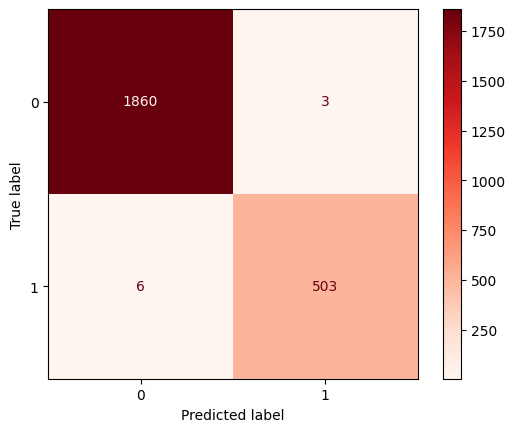

In [406]:
y_pred_train = rf.predict(X_train_scaled)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_scaled, y_train, cmap='Reds'))

Dari classification report, kelihatan values accuracy, precision, dan recall sangat tinggi dan adalah overfitting. Kita bisa coba paramaeter tuning untuk memperbaik nilainya. 

In [407]:

f1_train_cross_val = cross_val_score(rf,
                                     X_train_scaled,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.49618321 0.41732283 0.4911032 ]
F1 Score - Mean - Cross Validation :  0.46820308119983817
F1 Score - Std - Cross Validation  :  0.036037491823006584
F1 Score - Range of Test-Set       :  0.4321655893768316 - 0.5042405730228448


F1 Score - Test Set   :  0.5471698113207547 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       467
           1       0.67      0.46      0.55       126

    accuracy                           0.84       593
   macro avg       0.77      0.70      0.72       593
weighted avg       0.83      0.84      0.83       593
 

Confusion Matrix      : 


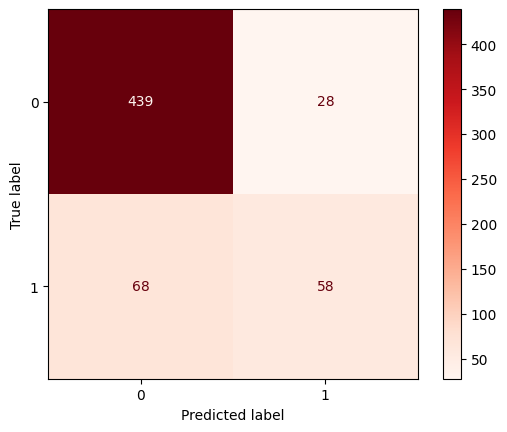

In [408]:
y_pred_test = rf.predict(X_test_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, cmap='Reds'))

In [409]:

all_reports = {}

def performance_report(all_reports, y_train, y_pred_train_svc, y_test, y_pred_test_svc, name):
    score_reports = {
        'train - precision': precision_score(y_train, y_pred_train_svc),
        'train - recall': recall_score(y_train, y_pred_train_svc),
        'train - accuracy': accuracy_score(y_train, y_pred_train_svc),
        'train - f1_score': f1_score(y_train, y_pred_train_svc),
        'test - precision': precision_score(y_test, y_pred_test_svc),
        'test - recall': recall_score(y_test, y_pred_test_svc),
        'test - accuracy': accuracy_score(y_test, y_pred_test_svc),
        'test - f1_score': f1_score(y_test, y_pred_test_svc),
    }
    all_reports[name] = score_reports
    return all_reports

# Example usage (ensure y_pred_train_svc and y_pred_test_svc are defined)
all_reports = performance_report(all_reports, y_train, y_pred_train_svc, y_test, y_pred_test_svc, 'Baseline (Default Hyperparameter)')
report_df = pd.DataFrame(all_reports)
print(report_df)


                   Baseline (Default Hyperparameter)
train - precision                           0.771084
train - recall                              0.377210
train - accuracy                            0.842327
train - f1_score                            0.506596
test - precision                            0.769231
test - recall                               0.396825
test - accuracy                             0.846543
test - f1_score                             0.523560


Kita akan coba save baseline model kedalam dictionary "all_report" untuk menumpang data dari random dan grid search. 

In [410]:

# Define the parameter distribution
random_search_params = {
    'n_estimators': randint(50, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(range(10, 110, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}


# Initialize RandomizedSearchCV with reduced iterations and fewer CV folds
rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=random_search_params,
                                 n_iter=20,  # Reduced number of iterations
                                 cv=3,       # Reduced number of CV folds
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='f1')

# Fit the model
rf_randomcv.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best Parameters:", rf_randomcv.best_params_)
print("Best Score:", rf_randomcv.best_score_)

# Make predictions with the best estimator
y_pred = rf_randomcv.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


/opt/miniconda3/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/opt/miniconda3/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/ma

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 159}
Best Score: 0.4781662991940268
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       467
           1       0.73      0.44      0.55       126

    accuracy                           0.85       593
   macro avg       0.80      0.70      0.73       593
weighted avg       0.84      0.85      0.83       593



Kita akan membuat parameter untuk random search dengan model RandomizedSearchCV untuk mengoptimisasi performance model. Selection dari n_iter atau CV bisa diganti untuk ganti random combination yang akan digunakan dalam search process, dan juga mengoptimisasi beberapa K-folds yang akan di validate dalam beberapa set. 



In [411]:
rf_randomcv.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 8,
 'n_estimators': 159}

In [412]:
rf_randomcv_best = rf_randomcv.best_estimator_

F1 Score - Test Set   :  0.5517241379310345 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       467
           1       0.73      0.44      0.55       126

    accuracy                           0.85       593
   macro avg       0.80      0.70      0.73       593
weighted avg       0.84      0.85      0.83       593
 

Confusion Matrix      : 


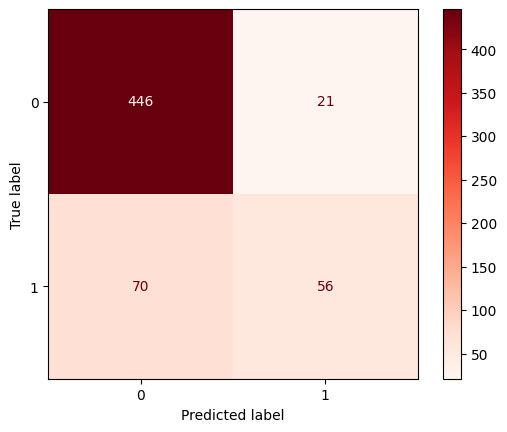

In [413]:
# Check Performance Model against Test-Set

y_pred_test = rf_randomcv_best.predict(X_test_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_scaled, y_test, cmap='Reds'))

In [414]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train_svc, y_test, y_pred_test_svc, 'Random Search')
pd.DataFrame(all_reports)

Baseline (Default Hyperparameter)  Random Search
train - precision                           0.771084       0.771084
train - recall                              0.377210       0.377210
train - accuracy                            0.842327       0.842327
train - f1_score                            0.506596       0.506596
test - precision                            0.769231       0.769231
test - recall                               0.396825       0.396825
test - accuracy                             0.846543       0.846543
test - f1_score                             0.523560       0.523560

Bisa kelihatan dari report bahwa tidak ada perbedaan dari baseline dan random search. Kita akan coba save model kedalam dictionary. 

### Grid Search

In [415]:
# Define a simplified parameter grid
grid_search_params = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search_params


{'n_estimators': [100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

Kita akan set parameter untuk grid search dengan variables n_estimators, max_features, dan lain lain. 

In [416]:
rf_randomcv.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 8,
 'n_estimators': 159}

In [417]:
rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=grid_search_params,
                         cv=3,
                         n_jobs=-1,
                         verbose=2,
                         scoring='f1')

rf_gridcv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_featu

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

Kita akan coba grid search dengan cross validation yang ditepatkan. 

In [418]:
rf_gridcv.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [419]:
rf_gridcv_best = rf_gridcv.best_estimator_

F1 Score - Test Set   :  0.5507246376811594 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       467
           1       0.70      0.45      0.55       126

    accuracy                           0.84       593
   macro avg       0.78      0.70      0.73       593
weighted avg       0.83      0.84      0.83       593
 

Confusion Matrix      : 


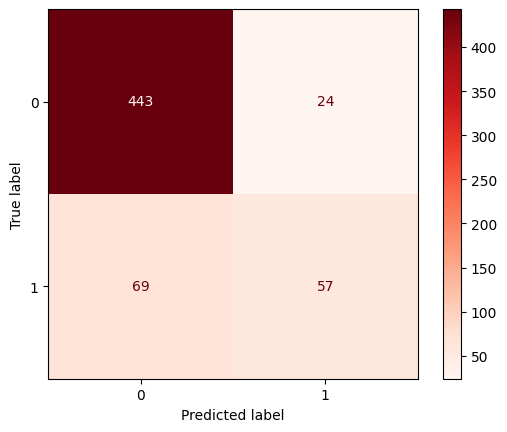

In [420]:
y_pred_test = rf_gridcv_best.predict(X_test_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test_scaled, y_test, cmap='Reds'))

In [421]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train_svc, y_test, y_pred_test_svc, 'Grid Search')
pd.DataFrame(all_reports)

Baseline (Default Hyperparameter)  Random Search  \
train - precision                           0.771084       0.771084   
train - recall                              0.377210       0.377210   
train - accuracy                            0.842327       0.842327   
train - f1_score                            0.506596       0.506596   
test - precision                            0.769231       0.769231   
test - recall                               0.396825       0.396825   
test - accuracy                             0.846543       0.846543   
test - f1_score                             0.523560       0.523560   

                   Grid Search  
train - precision     0.771084  
train - recall        0.377210  
train - accuracy      0.842327  
train - f1_score      0.506596  
test - precision      0.769231  
test - recall         0.396825  
test - accuracy       0.846543  
test - f1_score       0.523560

Bisa kelihatan dari report bahwa tidak ada perbedaan dari baseline, random search dan grid search. Kita akan coba save model kedalam dictionary. 

## Model Saving

In [422]:
#Model saving

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(selected_num_cols, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(selected_cat_cols, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

#with open('encoder.pkl', 'wb') as file_4:
  #pickle.dump(encoder, file_4)

with open('model.pkl', 'wb') as file_5:
  pickle.dump(lg, file_5)

Kita akan save data-data tersebut didalam Json files.

## Model Inference 

In [423]:
# Load model and other files

with open('list_cat_cols.txt', 'r') as file_1:
  list_cat_col = json.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
  list_num_col = json.load(file_2)

with open("model.pkl", "rb") as file_3:
  model = pickle.load(file_3)

with open("scaler.pkl", "rb") as file_4:
  scaler = pickle.load(file_4)

#with open("encoder.pkl", "rb") as file_5:
  #encoder = pickle.load(file_5)

Kita akan coba buka yang kita tadi save untuk dipake untuk inference.

In [424]:
import pandas as pd

# Read the data from the CSV file
file_path = "/Users/ryantrisnadi/Desktop/first_project1/p1-ftds017-hck-g5-ryantrisnadi/_P1G5_Set_1_Ryan_Trisnadi.csv"
df_original = pd.read_csv(file_path)

# Create a new DataFrame with the specified index columns
index_columns = ['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
                 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
                 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
                 'pay_amt_6', 'default_payment_next_month']
df_data_dummy = df_original[index_columns].copy()

# Display the new DataFrame
print(df_data_dummy.head())


   limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0        80000.0    1                6               1  54.0    0.0    0.0   
1       200000.0    1                4               1  49.0    0.0    0.0   
2        20000.0    2                6               2  22.0    0.0    0.0   
3       260000.0    2                4               2  33.0    0.0    0.0   
4       150000.0    1                4               2  32.0    0.0    0.0   

   pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
0    0.0    0.0    0.0  ...     29296.0     26210.0     17643.0     2545.0   
1    0.0    0.0    0.0  ...     50146.0     50235.0     48984.0     1689.0   
2    0.0    0.0    0.0  ...      1434.0       500.0         0.0     4641.0   
3    0.0    0.0    0.0  ...     27821.0     30767.0     29890.0     5000.0   
4    0.0   -1.0    0.0  ...    150464.0    143375.0    146411.0     4019.0   

   pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
0 

Kita akan menggunakan data asli yang belum diolah sebagai data dummy dinamakan "data1"

In [425]:
df_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Cek data "dummy" jika sudah benar dengan yang original. 

In [426]:
df_data_dummy.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

Cek kolom dari yang "dummy" jika sudah sesuai.

In [427]:

# Assuming df_data_dummy, selected_num_cols, and selected_cat_cols are defined
data_inference_num = df_data_dummy[selected_num_cols]
data_inference_cat = df_data_dummy[selected_cat_cols]

data_inference_num.fillna(0, inplace=True)  # Assuming missing values are filled with 0
data_inference_cat.fillna('Unknown', inplace=True)  # Filling categorical missing values with 'Unknown'

# Fit the MinMaxScaler on the numerical features
scaler.fit(data_inference_num)

# Transform the numerical features using the fitted scaler
data_inference_num_scaled = scaler.transform(data_inference_num)

# Concatenate the scaled numerical features and the categorical features
data_inference_final = np.concatenate([data_inference_num_scaled, data_inference_cat], axis=1)

# Now data_inference_final contains both scaled numerical features and categorical features
print(data_inference_final)


[[8.86075949e-02 2.00000000e-01 2.22222222e-01 ... 1.39665164e-03
  8.62453532e-04 6.00000000e+00]
 [2.40506329e-01 2.00000000e-01 2.22222222e-01 ... 6.44212013e-03
  7.43494424e-03 4.00000000e+00]
 [1.26582278e-02 2.00000000e-01 2.22222222e-01 ... 3.86527208e-03
  0.00000000e+00 6.00000000e+00]
 ...
 [5.56962025e-01 0.00000000e+00 0.00000000e+00 ... 1.00497074e-03
  9.66542751e-04 2.00000000e+00]
 [5.06329114e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.93308550e-03 2.00000000e+00]
 [3.54430380e-01 3.00000000e-01 0.00000000e+00 ... 1.00497074e-03
  1.63990087e-02 2.00000000e+00]]


Kita mau bagi dari data dummy dengan list numerical dan categorical dari hasil "data" original. Kita akan bagi jadi dua variable dan masukan mengunakan scalar jadi bisa membuat inference baru jika digabung lagi dengan feature "concatenate". Kita bisa terus melihat prediksi output dengan data "dummy" dengan target variable. 

In [428]:
print(selected_cat_cols)
print(selected_num_cols)

['education_level']
['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


Lihat kolom yang akan digunakan karena terpilih sebagai signifikan data.

In [429]:
# Predict the score
predicted_score = lg.predict(data_inference_final)

# Show result
print(f"Predicted Overall: {predicted_score[0]:.2f}")

Predicted Overall: 0.00


Insight: Dari data inferensial, Kita bisa lihat bahwa jika faktor variable sudah semua dimasukan kedalam model, maka output dari target variable akan keluarkan 0.00. Ini artinya data dummy dan original tidak sesuai untuk model tersebut. 

## Conclusion

Setelah kita menggunakan test Logistic Regression, KNN, dan SVM, kita bisa lihat perbandingan model yang digunakan oleh machine learning untuk prediksi bagaimana client bisa diprediksi untuk default payment atau tidak. Karena saking banyak numerik data yang harus diolah, maka interpretasi dari setiap test harus bisa disimpulkan dalam parameter dan cross validation. Di konteks test ini, SVM telah dipakai karena skor dari akurasi, recall, precision, dan F-1 rata-rata yang paling tinggi, tetapi ini tidak selalu benar dalam setiap situasi. Bisa bilang saja ada dataset yang memiliki variable age, sex, marital_status, atau education_level yang beda saja akan mempunyai dampak besar terhadap test regresi atau model yang digunakan untuk KNN atau SVM.

Kita menggunakan SVM di cross validation dan parameter tuning di test ini karena leih effektif model dalam dimensi lebih tinggi karena klassifikasi fitur sangat tinggi. Juga, kita bisa pilih antar linear, polynomial, dan RBF untuk pilih perbedaan kompleks dataset dengan boundaries yang linear atau non-linear. Oleh karena itu, Data yang digunakan bisa di "customize" terhadap splitting dataset yang digunakan karena sebagai analis, kita tidak tau distribusi dari setiap sample size, dan SVM adalah model yang paling flexible untuk menjelaskan relasi antar "default_payment" terhadap variable numerikal dan kategorikal di dataset tersebut. 

Dalam kesimpulan, bisa dikatakan bahwa faktor limit_balance, education_level, pay, dan pay_amt memiliki dampak paling signifikan terhadap prediksi jika client akan lunas bayar tagihan. 

Pertanyaan:

    Resiko apa saja client bank dengan limit balance yang sangat tinggi terhadap utang mereka?
    Client yang memiliki limit balance lebih tinggi cenderung bayar tagihan pada tepat waktu daripada yang gagal bayar. 

    Apakah ada dampak "education" terhadap default_payment_next_month?
    Pendidikan client yang lebih tinggi memiliki ratio yang lebih baik terhadap kelunasan pembayaran utang. 

    Adakah perbedaan "pay" dan "bill_amt" yang bisa disimpulkan terhadap kemampuan client untuk membayar utang balik? 
    Client yang memiliki pay paling dekat terhadap bill_amt akan punya kemungkinan lebih besar untuk bayar balik utang pada bulan itu, dan tidak akan "default" untuk bulan keberikutnya. 
    
    Resiko yang paling tinggi di kolom-kolom apa saja?
    Limit balance, age, dan education level dan adalah faktor yang memiliki dampak terbesar terhadap "default" payment dari client. 

### Conceptual Problems
### Jawab pertanyaan berikut:

    Apakah yang dimaksud dengan coeficient pada logistic regression?
    Coefficient pada Logistic Regression mengacu pada nilai yang menunjukkan seberapa besar pengaruh suatu fitur terhadap hasil prediksi model. Dalam konteks logistic regression, koefisien digunakan untuk mengkalibrasi kontribusi setiap fitur terhadap probabilitas prediksi kelas target yang diberikan. Koefisien positif menunjukkan korelasi positif antara fitur tersebut dengan kelas target, sedangkan koefisien negatif menunjukkan korelasi negatif.

    Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!
    Parameter kernel pada Support Vector Machine (SVM) digunakan untuk menentukan jenis fungsi kernel yang digunakan untuk mentransformasikan data ke dalam ruang fitur yang lebih tinggi. Salah satu kernel yang umum digunakan adalah kernel RBF (Radial Basis Function). Kernel RBF memungkinkan SVM untuk menangani data yang tidak linear dengan memetakan data ke dalam ruang dimensi yang lebih tinggi, di mana pemisah linear menjadi lebih mungkin.

    Bagaimana cara memilih K yang optimal pada KNN?
    Untuk memilih nilai K yang optimal pada K-Nearest Neighbors (KNN), dapat dilakukan dengan menggunakan metode validasi silang (cross-validation). Dengan menggunakan teknik ini, kita dapat membagi data menjadi subset untuk pelatihan dan pengujian, dan kemudian menghitung performa model KNN dengan berbagai nilai K. Nilai K yang memberikan performa terbaik pada data pengujian adalah K yang optimal untuk digunakan pada model KNN.

    Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya?
    Accuracy: Mengukur seberapa sering model melakukan prediksi yang benar dari semua prediksi yang dilakukan. Baik digunakan ketika kelas target memiliki distribusi yang seimbang.
    Precision: Mengukur proporsi prediksi positif yang benar dari total prediksi positif. Berguna ketika penting untuk meminimalkan false positive.
    Recall: Mengukur proporsi positif sebenarnya yang diprediksi dengan benar dari semua kelas positif yang sebenarnya. Berguna ketika penting untuk meminimalkan false negative.
    F1 Score: Kombinasi dari Precision dan Recall, digunakan untuk mengukur keseimbangan antara Precision dan Recall. Berguna ketika kelas target tidak seimbang.
    Waktu yang tepat untuk menggunakan masing-masing metrik ini tergantung pada tujuan dan karakteristik dari data serta masalah yang sedang dihadapi. Sebagai contoh, jika kelas target seimbang, maka Accuracy dapat menjadi metrik yang baik. Namun, jika kelas target tidak seimbang (imbalance class), maka menggunakan Precision, Recall, dan F1 Score dapat memberikan gambaran yang lebih akurat tentang performa model.


### Recommendation

Di test tersebut ada beberapa masalah dengan merangka model seperti waktu di hypertuning test, CV atau n_iter terlalu kecil karena waktu untuk proses terlalu lama. Oleh karena itu test telah diganti variable CV atau n_iter yang lebih kecil untuk perpendek waktu test. Dibawah ada beberapa saran untuk memperbaik test diatas untuk lain kali:

1. Waktu Cross validation dan hypertuning test, coba CV, n-iter, atau n_jobs yang lebih besar jadi bisa dapat akurasi, precision, recall, dan f-1 score yang lebih jelas dan beda dari yang original.

2. Modifikasi data dummy dengan variable yang teratur jadi model inferensi memiliki jawaban yang bukan 0.00.